# Used Car Regression
**ML Project 2 - Spring 2022**

Collaborators: Ben DeSollar and Matt McDonell

Through research we found that a called neural network model called KerasRegressor worked the best after testing a couple different model including
    KNeighborsRegressor, Lasso, Ridge, DecisionTreeRegressor, and RandomForestRegressor. We improved our results by modifying our feature selection to include as many features as we 
    could to help predict the best values. By modifying our featuiues 
    during testing we were able to find the best model predictions, which turned out to be all feautures.

### Step 1
Import the required packages and frameworks.

In [1]:
# imports
import numpy as np
from mlwpy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, neighbors,
                     naive_bayes,
                     model_selection as skms,
                     linear_model, dummy,
                     metrics,
                     pipeline,
                     preprocessing as skpre) 
import csv
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import category_encoders as ce
import pandas.util.testing as tm
import category_encoders as ce

import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
2022-04-25 19:15:33.456999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib
2022-04-25 19:15:33.457027: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Step 2
Read in the .csv files and create DataFrames

In [2]:
data_train_df = pd.read_csv("cars_reg_train.csv") 
data_test_df = pd.read_csv("cars_reg_test.csv")
data_train_ft = data_train_df.drop('price', axis=1)
data_train_tgt = data_train_df["price"]

### Step 3
Focus down to the features we think will have the largest on the price

We originally looked at features that we thought would influence the price of the car the most, such as year, fuel, odemeter, and type. However this assumption was proved incorrect after doing feature engineering later on and finding that using all of the features produced the most accurate model.

In [3]:
# To see what kind of data we're working with
print(data_train_ft.dtypes)
print(data_train_ft.head(5))

# From looking at the data it looks like Draft and all star apperances should be useful. 
# Feauture used will need to be transformed into numbers in order to use the prediction models and have them be uniform≥ 

Unnamed: 0        int64
url              object
region           object
region_url       object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object
   Unnamed: 0                                                url  \
0      259073  https://newjersey.craigslist.org/cto/d/bloomin...   
1      445077  https://denver.craigslist.org/cto/d/henderson-...   
2      109862  https://spacecoast.craigslist.org/cto/d/merrit...   
3       17375  https://yuma.craigslist.org/cto/d/yuma-2016-fo...   
4       51906  https://sacramento.craigslist.org/ctd/d/san-ra...   

 

### Step 4
Convert numbers to their correct formats and fill in any missing values. 

Missing values don't help us in our quest for accuracy, but filling them in as zero won't necessarily hurt us either.

Also concert all categorical values using a target encoder.

In [4]:
features = ['url',
           'region',
           'region_url',
           'year',
           'manufacturer',
           'model',
           'condition',
           'cylinders',
           'fuel',
           'odometer',
           'title_status',
           'transmission',
           'VIN',
           'drive',
           'size',
           'type',
           'paint_color',
           'image_url',
           'description',
           'state',
           'lat',
           'long',
           'posting_date'
          ]
data_train_ft['posting_date'] = pd.to_datetime(data_train_ft['posting_date'], utc=True)
data_train_ft['posting_date'] = pd.to_datetime(data_train_ft['posting_date'])
data_train_ft['posting_date'] = (pd.DatetimeIndex(data_train_ft['posting_date']).day) + (pd.DatetimeIndex(data_train_ft['posting_date']).month*12) + ((2022 - pd.DatetimeIndex(data_train_ft['posting_date']).year)*365)
data_train_ft['posting_date'] = data_train_ft['posting_date'].astype(float)
print(data_train_ft['posting_date'].head(5))
data_test_df['posting_date'] = pd.to_datetime(data_test_df['posting_date'], utc=True)
data_test_df['posting_date'] = pd.to_datetime(data_test_df['posting_date'])
data_test_df['posting_date'] = (pd.DatetimeIndex(data_test_df['posting_date']).day) + (pd.DatetimeIndex(data_test_df['posting_date']).month*12) + ((2022 - pd.DatetimeIndex(data_test_df['posting_date']).year)*365)
data_test_df['posting_date'] = data_test_df['posting_date'].astype(float)
print(data_test_df['posting_date'].head(5))

data_train_ft = data_train_ft[features]
data_train_ft = data_train_ft.fillna(0)

data_test_ft = data_test_df
data_test_df = data_test_df[features]
data_test_df = data_test_df.fillna(0)

encoder = ce.TargetEncoder()
data_train_ft = encoder.fit_transform(data_train_ft, data_train_tgt)
data_test_df = encoder.transform(data_test_df)


0               891.0000
1               877.0000
2               876.0000
3               872.0000
4               875.0000
Name: posting_date, dtype: float64
0               876.0000
1               884.0000
2               891.0000
3               885.0000
4               870.0000
Name: posting_date, dtype: float64


### Step 5
Pick the best catgeory by using feature engineering. Found that using all features pruduced the best results. We 
originally assumed that the urls would hurt the model, but found this to not be the case. 

In [5]:
lmlr = linear_model.LogisticRegression

ftrsel = ftr_sel.RFE(linear_model.LinearRegression(), n_features_to_select=23)

ftrsel.fit_transform(data_train_ft, data_train_tgt)

print(np.array(data_train_ft.columns.value_counts().index)[ftrsel.get_support()])
print(data_train_ft.columns.value_counts().count())
new_features = np.array(data_train_ft.columns.value_counts().index)[ftrsel.get_support()]
data_train_ft = data_train_ft[new_features]
data_test_df = data_test_df[new_features]

['url' 'VIN' 'long' 'lat' 'state' 'description' 'image_url' 'paint_color'
 'type' 'size' 'drive' 'transmission' 'region' 'title_status' 'odometer'
 'fuel' 'cylinders' 'condition' 'model' 'manufacturer' 'year' 'region_url'
 'posting_date']
23


### Step 6
Show the updated Dataframes and then convert all datatypes to type float and reshow dataframes with new info.

In [6]:

print("data_train_ft:")
display(data_train_ft.head(10))
print("data_train_ft.info():")
display(data_train_ft.info())

data_train_ft = data_train_ft.astype(float)
data_test_df = data_test_df.astype(float)

print("data_train_ft:")
display(data_train_ft.head(10))
print("data_train_ft.info():")
display(data_train_ft.info())


data_train_ft:


,url,VIN,long,lat,state,description,image_url,paint_color,type,size,...,title_status,odometer,fuel,cylinders,condition,model,manufacturer,year,region_url,posting_date
0,"37,049.8606","73,271.0557",-74.3338,41.0128,"13,671.8355","37,049.8606","37,049.8606","19,973.6736","42,954.1677","16,991.8029",...,"37,981.4225","92,051.0000","18,127.2068","10,435.5132","19,296.8522","11,385.0283","21,456.9174","2,010.0000","13,954.9136",891.0000
1,"37,049.8606","37,049.8606",-104.8509,39.9057,"17,003.2326","37,049.8606","37,049.8606","17,164.3702","42,954.1677","16,991.8029",...,"37,981.4225","16,988.0000","18,127.2068","117,299.5751","26,491.3656","246,096.4029","154,028.1301","1,967.0000","15,586.4039",877.0000
2,"37,049.8606","73,271.0557",-80.6568,28.2764,"16,543.3894","37,049.8606","37,049.8606","20,886.5770","29,376.5415","114,523.6073",...,"37,981.4225",0.0000,"18,127.2068","117,299.5751","19,296.8522","18,611.5649","23,042.1325","1,999.0000","15,174.7174",876.0000
3,"37,049.8606","73,271.0557",-114.4947,32.6168,"18,301.1678","37,049.8606","37,049.8606","14,289.9781","12,751.3464","114,523.6073",...,"37,981.4225","77,500.0000","18,127.2068","10,435.5132","19,296.8522","11,722.2381","21,641.5313","2,016.0000","22,547.8235",872.0000
4,"37,049.8606","30,059.5804",-122.5095,37.9632,"18,002.5749","37,049.8606","30,059.5804","17,164.3702","12,751.3464","19,520.3756",...,"37,981.4225","24,782.0000","18,127.2068","18,346.1787","19,296.8522","37,049.8606","17,914.1040","2,017.0000","16,741.5430",875.0000
5,"37,049.8606","73,271.0557",-74.4204,40.3777,"13,671.8355","37,049.8606","37,049.8606","19,973.6736","15,192.5417","19,520.3756",...,"37,981.4225","129,830.0000","18,127.2068","18,346.1787","74,469.7241","12,437.1450","11,634.8349","2,010.0000","15,593.7310",883.0000
6,"37,049.8606","37,049.8606",-121.6959,37.9388,"18,002.5749","37,049.8606","37,049.8606","21,391.6873","29,376.5415","16,991.8029",...,"37,981.4225","24,946.0000","18,127.2068","117,299.5751","19,296.8522","22,559.1066","17,115.1963","2,017.0000","18,692.6669",876.0000
7,"37,049.8606","73,271.0557",-74.7499,40.1859,"13,671.8355","7,467.8039","6,553.5592","14,289.9781","11,312.5776","19,520.3756",...,"37,981.4225","198,020.0000","18,127.2068","19,373.5496","19,296.8522","8,147.3152","17,115.1963","2,008.0000","10,558.9262",873.0000
8,"37,049.8606","73,271.0557",-120.7094,46.6165,"22,807.3548","37,049.8606","37,049.8606","223,570.3277","42,954.1677","19,520.3756",...,"37,981.4225","89,000.0000","18,127.2068","19,373.5496","19,296.8522","12,217.6974","21,641.5313","2,001.0000","20,689.3690",868.0000
9,"37,049.8606","37,989.9942",-73.9400,40.6400,"16,268.9175","37,049.8606","37,989.9942","21,391.6873","23,521.8858","19,520.3756",...,"37,981.4225","34,706.0000","18,127.2068","18,346.1787","74,469.7241","38,730.0000","21,641.5313","2,018.0000","15,684.5569",876.0000


data_train_ft.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200916 entries, 0 to 200915
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           200916 non-null  float64
 1   VIN           200916 non-null  float64
 2   long          200916 non-null  float64
 3   lat           200916 non-null  float64
 4   state         200916 non-null  float64
 5   description   200916 non-null  float64
 6   image_url     200916 non-null  float64
 7   paint_color   200916 non-null  float64
 8   type          200916 non-null  float64
 9   size          200916 non-null  float64
 10  drive         200916 non-null  float64
 11  transmission  200916 non-null  float64
 12  region        200916 non-null  float64
 13  title_status  200916 non-null  float64
 14  odometer      200916 non-null  float64
 15  fuel          200916 non-null  float64
 16  cylinders     200916 non-null  float64
 17  condition     200916 non-n

None

data_train_ft:


,url,VIN,long,lat,state,description,image_url,paint_color,type,size,...,title_status,odometer,fuel,cylinders,condition,model,manufacturer,year,region_url,posting_date
0,"37,049.8606","73,271.0557",-74.3338,41.0128,"13,671.8355","37,049.8606","37,049.8606","19,973.6736","42,954.1677","16,991.8029",...,"37,981.4225","92,051.0000","18,127.2068","10,435.5132","19,296.8522","11,385.0283","21,456.9174","2,010.0000","13,954.9136",891.0000
1,"37,049.8606","37,049.8606",-104.8509,39.9057,"17,003.2326","37,049.8606","37,049.8606","17,164.3702","42,954.1677","16,991.8029",...,"37,981.4225","16,988.0000","18,127.2068","117,299.5751","26,491.3656","246,096.4029","154,028.1301","1,967.0000","15,586.4039",877.0000
2,"37,049.8606","73,271.0557",-80.6568,28.2764,"16,543.3894","37,049.8606","37,049.8606","20,886.5770","29,376.5415","114,523.6073",...,"37,981.4225",0.0000,"18,127.2068","117,299.5751","19,296.8522","18,611.5649","23,042.1325","1,999.0000","15,174.7174",876.0000
3,"37,049.8606","73,271.0557",-114.4947,32.6168,"18,301.1678","37,049.8606","37,049.8606","14,289.9781","12,751.3464","114,523.6073",...,"37,981.4225","77,500.0000","18,127.2068","10,435.5132","19,296.8522","11,722.2381","21,641.5313","2,016.0000","22,547.8235",872.0000
4,"37,049.8606","30,059.5804",-122.5095,37.9632,"18,002.5749","37,049.8606","30,059.5804","17,164.3702","12,751.3464","19,520.3756",...,"37,981.4225","24,782.0000","18,127.2068","18,346.1787","19,296.8522","37,049.8606","17,914.1040","2,017.0000","16,741.5430",875.0000
5,"37,049.8606","73,271.0557",-74.4204,40.3777,"13,671.8355","37,049.8606","37,049.8606","19,973.6736","15,192.5417","19,520.3756",...,"37,981.4225","129,830.0000","18,127.2068","18,346.1787","74,469.7241","12,437.1450","11,634.8349","2,010.0000","15,593.7310",883.0000
6,"37,049.8606","37,049.8606",-121.6959,37.9388,"18,002.5749","37,049.8606","37,049.8606","21,391.6873","29,376.5415","16,991.8029",...,"37,981.4225","24,946.0000","18,127.2068","117,299.5751","19,296.8522","22,559.1066","17,115.1963","2,017.0000","18,692.6669",876.0000
7,"37,049.8606","73,271.0557",-74.7499,40.1859,"13,671.8355","7,467.8039","6,553.5592","14,289.9781","11,312.5776","19,520.3756",...,"37,981.4225","198,020.0000","18,127.2068","19,373.5496","19,296.8522","8,147.3152","17,115.1963","2,008.0000","10,558.9262",873.0000
8,"37,049.8606","73,271.0557",-120.7094,46.6165,"22,807.3548","37,049.8606","37,049.8606","223,570.3277","42,954.1677","19,520.3756",...,"37,981.4225","89,000.0000","18,127.2068","19,373.5496","19,296.8522","12,217.6974","21,641.5313","2,001.0000","20,689.3690",868.0000
9,"37,049.8606","37,989.9942",-73.9400,40.6400,"16,268.9175","37,049.8606","37,989.9942","21,391.6873","23,521.8858","19,520.3756",...,"37,981.4225","34,706.0000","18,127.2068","18,346.1787","74,469.7241","38,730.0000","21,641.5313","2,018.0000","15,684.5569",876.0000


data_train_ft.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200916 entries, 0 to 200915
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           200916 non-null  float64
 1   VIN           200916 non-null  float64
 2   long          200916 non-null  float64
 3   lat           200916 non-null  float64
 4   state         200916 non-null  float64
 5   description   200916 non-null  float64
 6   image_url     200916 non-null  float64
 7   paint_color   200916 non-null  float64
 8   type          200916 non-null  float64
 9   size          200916 non-null  float64
 10  drive         200916 non-null  float64
 11  transmission  200916 non-null  float64
 12  region        200916 non-null  float64
 13  title_status  200916 non-null  float64
 14  odometer      200916 non-null  float64
 15  fuel          200916 non-null  float64
 16  cylinders     200916 non-null  float64
 17  condition     200916 non-n

None

### Step 7
Create a heat map to visualize trends present in the data.

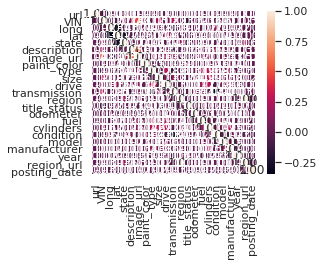

In [7]:
correlation_map = np.corrcoef(data_train_ft.values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=new_features, xticklabels=new_features)

plt.show()

### Step 8
Scale the data to prevent outliers from affecting model

In [8]:
from sklearn.preprocessing import MinMaxScaler
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

data_train_ft, data_test_df = scale_datasets(data_train_ft, data_test_df)

### Step 9
This is another portion where accuracy is most directly influenced. We added as many models as possible (within reason) to ensure that we were covering all our bases to get the most accurate predictions.

In [9]:

pipelines = {
    'LR' : LinearRegression(),
    'EL Net' : ElasticNet(random_state=0),
    #'CART' : DecisionTreeRegressor(max_depth=10)
    'RandomForest' : sklearn.ensemble.RandomForestRegressor()
    }
# Commented out models did not perform well enough to keep testing
#for k in range(1,11,2):
    #pipelines[f'KNN-{k}'] = KNeighborsRegressor(n_neighbors=k)
#for i in range(25,45,5):
    #pipelines[f'GBR-{i}'] = GradientBoostingRegressor(random_state=21, n_estimators=i)
values = [40, 50, 100]
for alpha_value in values:
    pipelines[f'Lasso (C={alpha_value})'] = linear_model.Lasso(alpha=alpha_value)
    pipelines[f'Ridge (C={alpha_value})'] = linear_model.Ridge(alpha=alpha_value)

### Step 10
Using different standardizing pipelines, run multiple cross-validation tests on the data splits to find the best performing model.

Further refine the selection of best model by comparing scores.

In [10]:
accuracy_scores = {}
for pipeline_name in pipelines:
    #loo = skms.LeaveOneOut()
    print(f'Currently testing model: {pipeline_name}')
    scores = skms.cross_val_score(pipelines[pipeline_name],
                                  data_train_ft,
                                  data_train_tgt,
                                  #cv=loo,
                                  cv=10,
                                  scoring='neg_mean_squared_error')
    scores = np.sqrt(-scores.mean())
    accuracy_scores[pipeline_name] = scores
    print(f'{pipeline_name}: {scores:.3f}')

best_model_name = min(accuracy_scores,key=accuracy_scores.get)
print(f'\nBest model: {best_model_name} (accuracy = {accuracy_scores[best_model_name]:.3f})')
final_model = pipelines[best_model_name]

car_scores_fit = final_model.fit(data_train_ft, 
                                   data_train_tgt)
predictions_normal = car_scores_fit.predict(data_test_df)

    
acuuracy = np.sqrt(mean_squared_error(data_train_tgt.iloc[0:predictions_normal.shape[0]],predictions_normal))

Currently testing model: LR
LR: 8101052.674
Currently testing model: EL Net
EL Net: 8078182.350
Currently testing model: RandomForest
RandomForest: 8019802.633
Currently testing model: Lasso (C=40)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1918340811722752.0, tolerance: 1311126280314963.2
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2117649804709888.0, tolerance: 1311126436373433.8
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2102768007733248.0, tolerance: 1311126374024097.2
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objecti

Lasso (C=40): 8100995.454
Currently testing model: Ridge (C=40)
Ridge (C=40): 8096114.907
Currently testing model: Lasso (C=50)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367127852099584.0, tolerance: 1311126436373433.8
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1357399520329728.0, tolerance: 1311126374024097.2
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522318804555776.0, tolerance: 1311126290395681.0
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objecti

Lasso (C=50): 8100977.284
Currently testing model: Ridge (C=50)
Ridge (C=50): 8095211.085
Currently testing model: Lasso (C=100)
Lasso (C=100): 8100888.969
Currently testing model: Ridge (C=100)
Ridge (C=100): 8091769.123

Best model: RandomForest (accuracy = 8019802.633)


### Step 11
Now we tested using a neural network

In [12]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredError()
model.compile(
    loss='mean_squared_error', 
    #optimizer=Adam(learning_rate=0.01), 
    metrics=[msle]
)
# train the model
history = model.fit(
    data_train_ft, 
    data_train_tgt, 
    epochs=5, 
    batch_size=64,
    validation_split=0.2
)
predictions_nn = model.predict(data_test_df)
acuuracy_nn = np.sqrt(mean_squared_error(data_train_tgt.iloc[0:predictions_nn.shape[0]],predictions_nn))

Epoch 1/5
2512/2512 [==============================] - 6s 2ms/step - loss: 81506475180032.0000 - mean_squared_error: 81488221569024.0000 - val_loss: 260974788608.0000 - val_mean_squared_error: 260922867712.0000
Epoch 2/5
2512/2512 [==============================] - 6s 3ms/step - loss: 81506861056000.0000 - mean_squared_error: 81488607444992.0000 - val_loss: 260928929792.0000 - val_mean_squared_error: 260877025280.0000
Epoch 3/5
2512/2512 [==============================] - 6s 2ms/step - loss: 81506626174976.0000 - mean_squared_error: 81488372563968.0000 - val_loss: 260929716224.0000 - val_mean_squared_error: 260877795328.0000
Epoch 4/5
2512/2512 [==============================] - 6s 2ms/step - loss: 81507020439552.0000 - mean_squared_error: 81488766828544.0000 - val_loss: 260916215808.0000 - val_mean_squared_error: 260864278528.0000
Epoch 5/5
2512/2512 [==============================] - 6s 2ms/step - loss: 81506710061056.0000 - mean_squared_error: 81488464838656.0000 - val_loss: 2609081

### Step 12
Select the best model based on the accuracy of the predictions.

In [16]:
if acuuracy_nn < acuuracy:
    predictions = predictions_nn
else:
    predictions = predictions_normal

### Step 13
Add our predictions to a submission file and save the final .csv

In [17]:
# This is just using the test.csv to setup a dataframe of the correct size
# and indicies (the "id" field).
make_submission_df = pd.read_csv("cars_reg_test.csv")
# drop all columns except 'id'
make_submission_df = make_submission_df[['id']]
# make sure the column of ID's that we just read in is the index column
make_submission_df = make_submission_df.set_index('id')
make_submission_df['price'] = predictions
make_submission_df.to_csv('submission.csv',sep=',', float_format='%.2f')